In [50]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gzip
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


# 1. Data Loading

In [2]:
# Read and print the first few lines of the file for verification
file_path = 'photoz_catalogues-master/Teddy/teddy_A'
with open(file_path, 'r') as file:
    for i in range(10):
        print(file.readline())

# Teddy catalogue - Set A

# N_gal = 74309

# feat1 is a normalized version of mag_r.

# feat2 is a normalized version of u-g, and so on.

# Please take feat1, ..., feat5 for training and testing.

#

#               id     mag_r       u-g       g-r       r-i       i-z    z_spec     feat1     feat2     feat3     feat4     feat5

1237645942905110768 18.914286  2.072901  1.386738  0.482288  0.272480  0.309728 -0.001069  0.205242  0.123685 -0.623802 -0.354959

1237645942905569773 19.394960  1.544794  1.557312  0.541681  0.418470  0.336479  0.283997 -0.262650  0.449938 -0.441687  0.242252

1237645943978328381 19.886253  1.028398  1.764324  0.672249  0.374681  0.406500  0.575361 -0.720166  0.845885 -0.041332  0.063122



In [4]:
# Define column names for the datasets based on the provided structure
column_names = ['id', 'mag_r', 'u-g', 'g-r', 'r-i', 'i-z', 'z_spec', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5']


# Load the Happy and Teddy datasets, skipping initial commented lines
happy_A = pd.read_csv('photoz_catalogues-master/Happy/happy_A', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
happy_B = pd.read_csv('photoz_catalogues-master/Happy/happy_B', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
happy_C = pd.read_csv('photoz_catalogues-master/Happy/happy_C', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
happy_D = pd.read_csv('photoz_catalogues-master/Happy/happy_D', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)

teddy_A = pd.read_csv('photoz_catalogues-master/Teddy/teddy_A', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
teddy_B = pd.read_csv('photoz_catalogues-master/Teddy/teddy_B', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
teddy_C = pd.read_csv('photoz_catalogues-master/Teddy/teddy_C', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)
teddy_D = pd.read_csv('photoz_catalogues-master/Teddy/teddy_D', sep=r'\s+', names=column_names, comment='#', skiprows=1, low_memory=False)

# Combine individual datasets for analysis if needed
happy = pd.concat([happy_A, happy_B, happy_C, happy_D], axis=0)
teddy = pd.concat([teddy_A, teddy_B, teddy_C, teddy_D], axis=0)


# 2. Data Preprocessing

In [5]:
print("Happy Dataset Info:")
print(happy.info())

Happy Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 74641
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      284807 non-null  int64  
 1   mag_r   284807 non-null  float64
 2   u-g     284807 non-null  float64
 3   g-r     284807 non-null  float64
 4   r-i     284807 non-null  float64
 5   i-z     284807 non-null  float64
 6   z_spec  284807 non-null  float64
 7   feat1   284807 non-null  float64
 8   feat2   284807 non-null  float64
 9   feat3   284807 non-null  float64
 10  feat4   284807 non-null  float64
 11  feat5   284807 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 28.2 MB
None


In [6]:
print("Teddy Dataset Info:")
print(teddy.info())

Teddy Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 322770 entries, 0 to 75923
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      322770 non-null  int64  
 1   mag_r   322770 non-null  float64
 2   u-g     322770 non-null  float64
 3   g-r     322770 non-null  float64
 4   r-i     322770 non-null  float64
 5   i-z     322770 non-null  float64
 6   z_spec  322770 non-null  float64
 7   feat1   322770 non-null  float64
 8   feat2   322770 non-null  float64
 9   feat3   322770 non-null  float64
 10  feat4   322770 non-null  float64
 11  feat5   322770 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 32.0 MB
None


In [7]:
print("Missing Values in Happy Dataset:")
print(happy.isnull().sum())

Missing Values in Happy Dataset:
id        0
mag_r     0
u-g       0
g-r       0
r-i       0
i-z       0
z_spec    0
feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
dtype: int64


In [8]:
print("Missing Values in Teddy Dataset:")
print(teddy.isnull().sum())

Missing Values in Teddy Dataset:
id        0
mag_r     0
u-g       0
g-r       0
r-i       0
i-z       0
z_spec    0
feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
dtype: int64


In [9]:
happy = happy.dropna()
teddy = teddy.dropna()

# Verify that there are no more missing values
print("Missing Values in Happy Dataset After Cleaning:")
print(happy.isnull().sum())

print("Missing Values in Teddy Dataset After Cleaning:")
print(teddy.isnull().sum())

Missing Values in Happy Dataset After Cleaning:
id        0
mag_r     0
u-g       0
g-r       0
r-i       0
i-z       0
z_spec    0
feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
dtype: int64
Missing Values in Teddy Dataset After Cleaning:
id        0
mag_r     0
u-g       0
g-r       0
r-i       0
i-z       0
z_spec    0
feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
dtype: int64


In [21]:
happy.to_csv('cleaned_happy_dataset.csv', index=False)
teddy.to_csv('cleaned_teddy_dataset.csv', index=False)

print("Datasets have been cleaned and saved.")

Datasets have been cleaned and saved.


# 3. Exploratory Data Analysis (EDA)

In [55]:
# Set plot styles
sns.set(style='whitegrid')

# Load the cleaned Happy dataset
happy = pd.read_csv('cleaned_happy_dataset.csv')

# Adding a 'Subsample' column to each dataset
for df, subsample in zip([happy_A, happy_B, happy_C, happy_D], ['Happy A', 'Happy B', 'Happy C', 'Happy D']):
    df['Subsample'] = subsample
# Combine the Happy datasets into one DataFrame
happy = pd.concat([happy_A, happy_B, happy_C, happy_D], ignore_index=True)


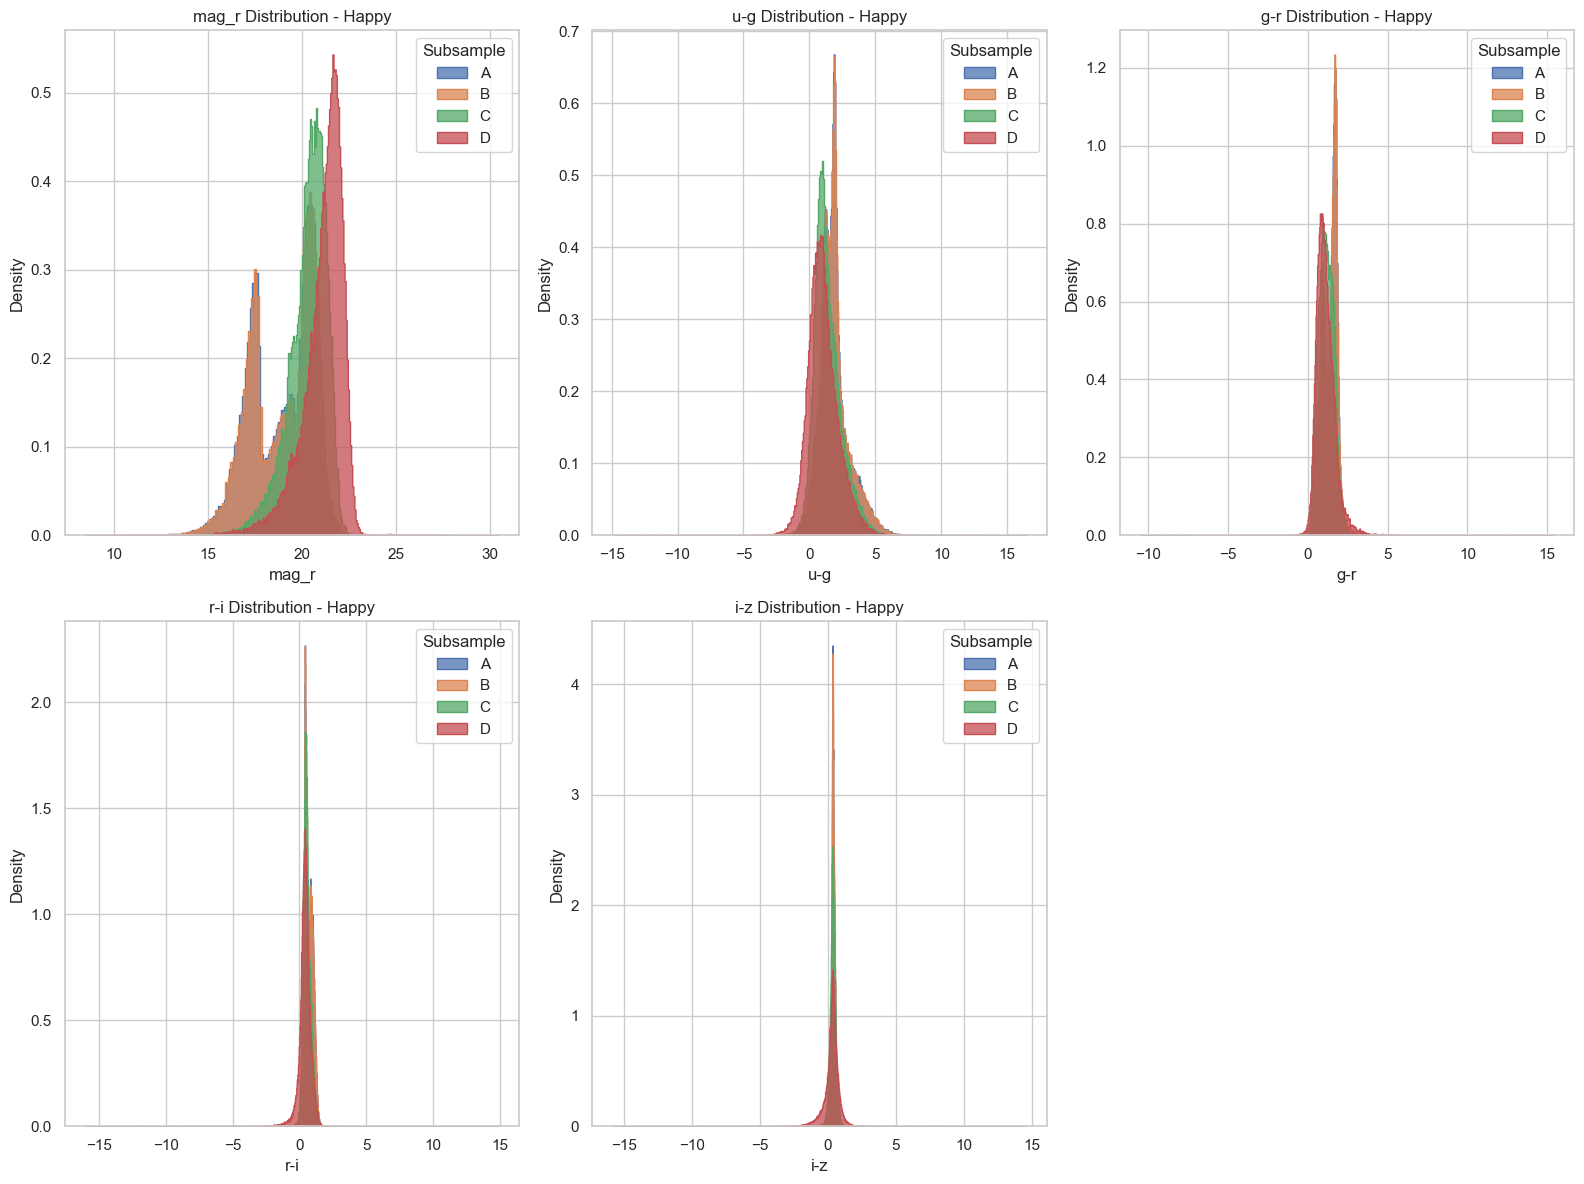

In [29]:
# Function to create histograms for each subsample
def plot_histograms(dataset, dataset_name):
    plt.figure(figsize=(16, 12))

    # Define the features to plot
    features = ['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']
    subsamples = dataset['Subsample'].unique()

    for i, feature in enumerate(features, 1):
        plt.subplot(2, 3, i)
        for subsample in subsamples:
            subset = dataset[dataset['Subsample'] == subsample]
            sns.histplot(data=subset, x=feature, label=subsample, element='step', stat='density', common_norm=False)
        plt.title(f'{feature} Distribution - {dataset_name}')
        plt.legend(title='Subsample')

    plt.tight_layout()
    plt.show()

# Plot histograms for Happy dataset
plot_histograms(happy, 'Happy')

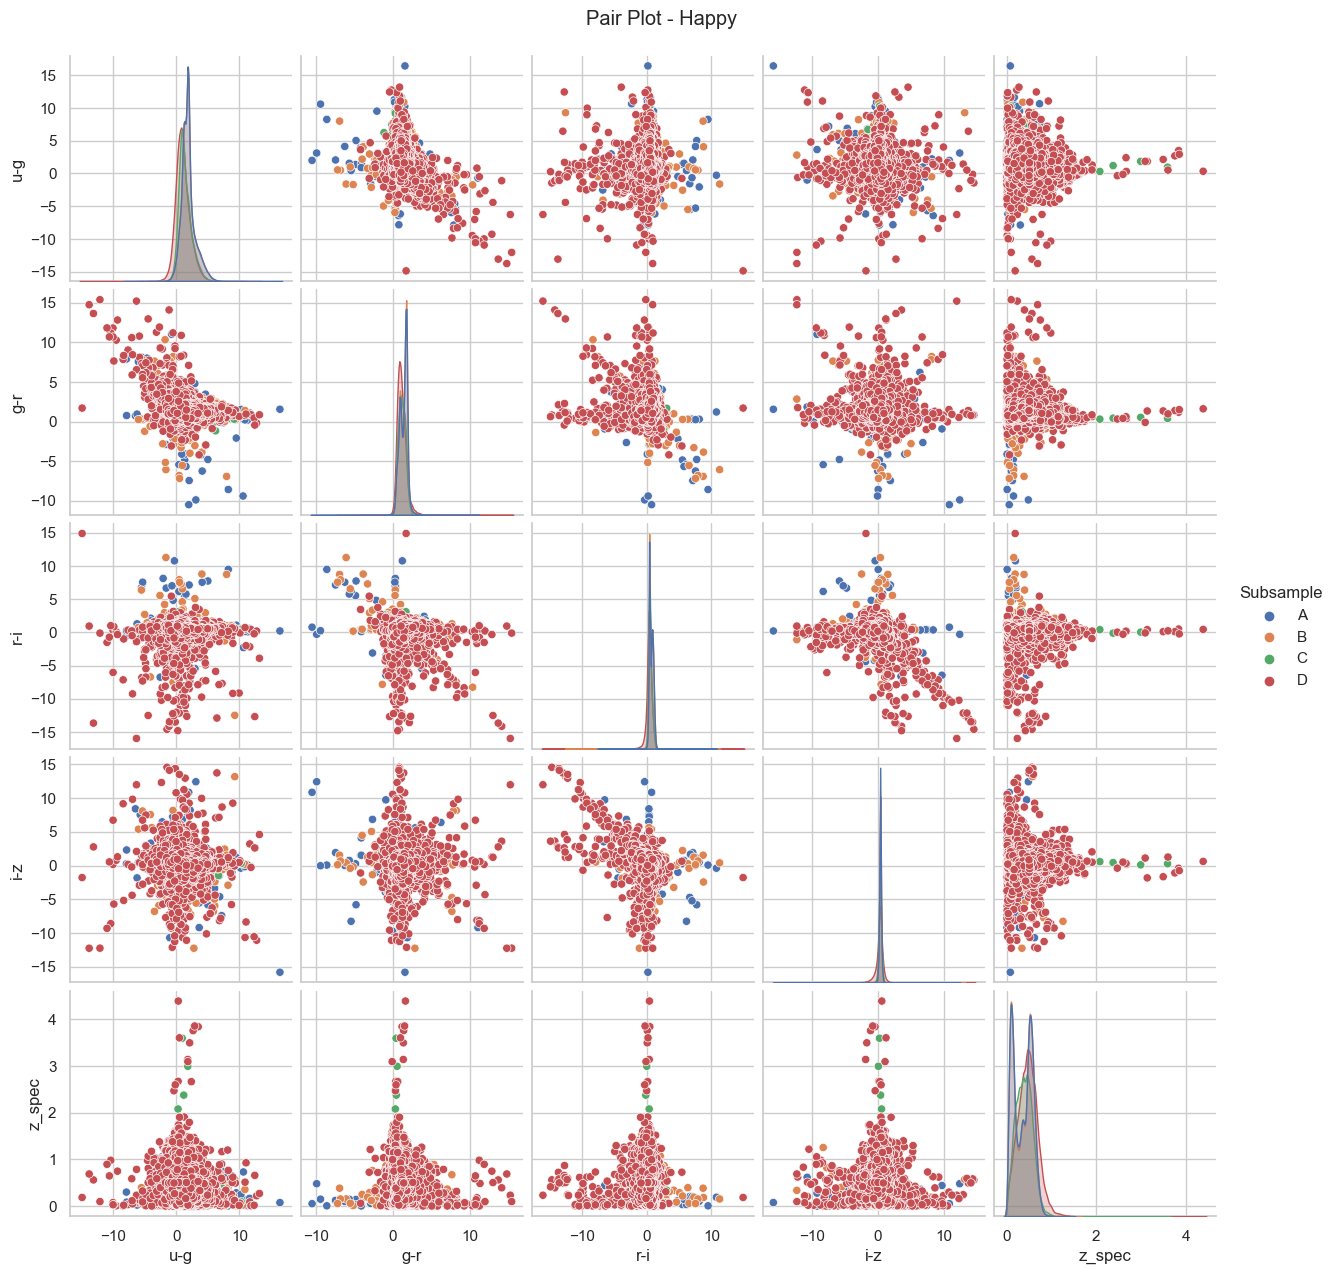

In [30]:
# Pair plot function
def plot_pairplot(dataset, dataset_name):
    sns.pairplot(dataset, hue='Subsample', vars=['u-g', 'g-r', 'r-i', 'i-z', 'z_spec'])
    plt.suptitle(f'Pair Plot - {dataset_name}', y=1.02)
    plt.show()

# Pair plots for Happy dataset
plot_pairplot(happy, 'Happy')


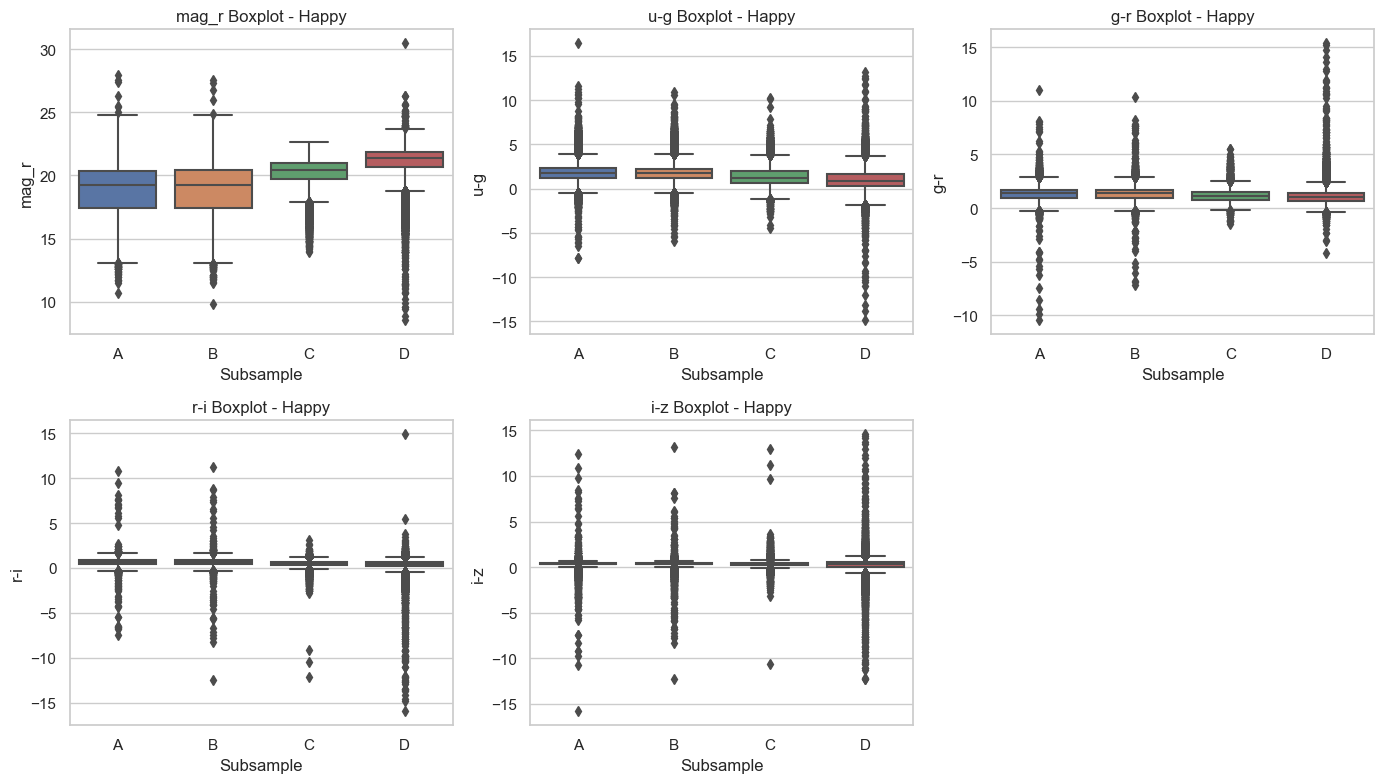

In [31]:
# Function to create box plots for a given dataset
def plot_boxplots(dataset, dataset_name):
    plt.figure(figsize=(14, 8))

    for i, feature in enumerate(['mag_r', 'u-g', 'g-r', 'r-i', 'i-z'], 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=dataset, x='Subsample', y=feature)
        plt.title(f'{feature} Boxplot - {dataset_name}')

    plt.tight_layout()
    plt.show()

# Box plots for Happy dataset
plot_boxplots(happy, 'Happy')


In [32]:
# Load the cleaned Teddy dataset
teddy = pd.read_csv('cleaned_teddy_dataset.csv')

# Adding a 'Subsample' column to each dataset
for df, subsample in zip([teddy_A, teddy_B, teddy_C, teddy_D], ['A', 'B', 'C', 'D']):
    df['Subsample'] = subsample
# Combine the Teddy datasets into one DataFrame
teddy = pd.concat([teddy_A, teddy_B, teddy_C, teddy_D], ignore_index=True)

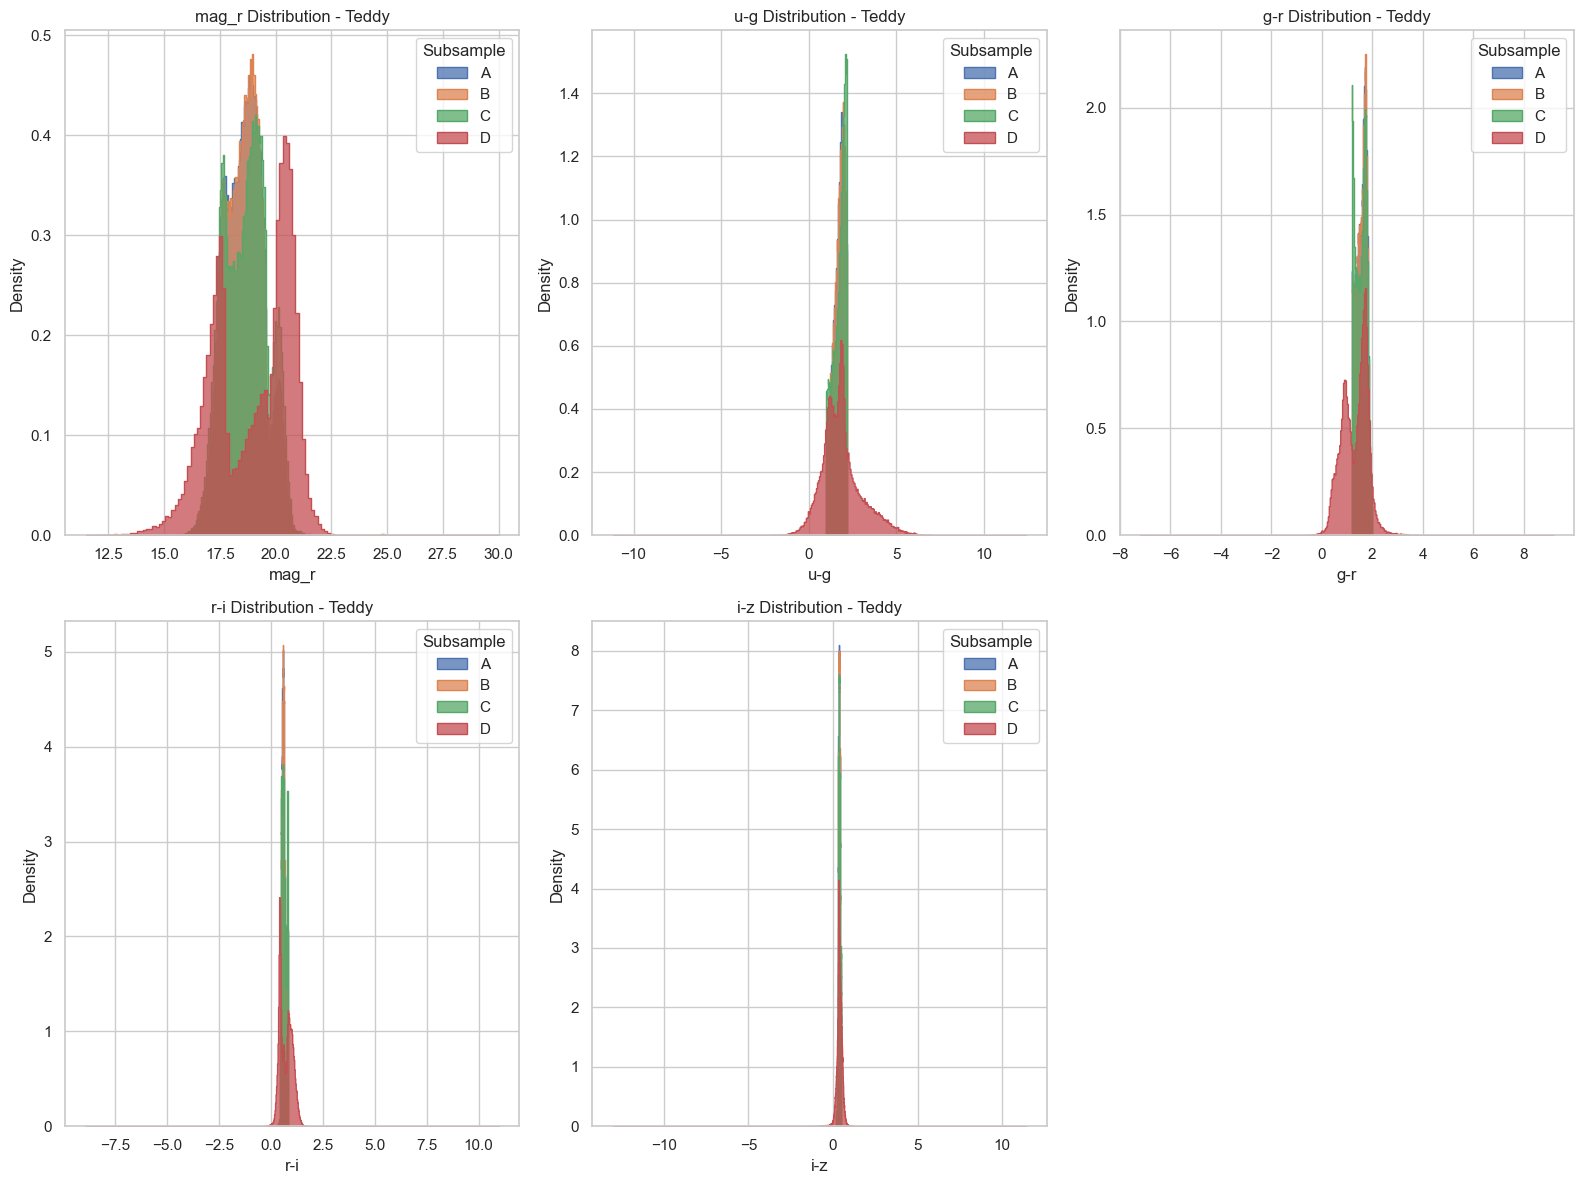

In [33]:
# Histograms for Teddy dataset
plot_histograms(teddy, 'Teddy')


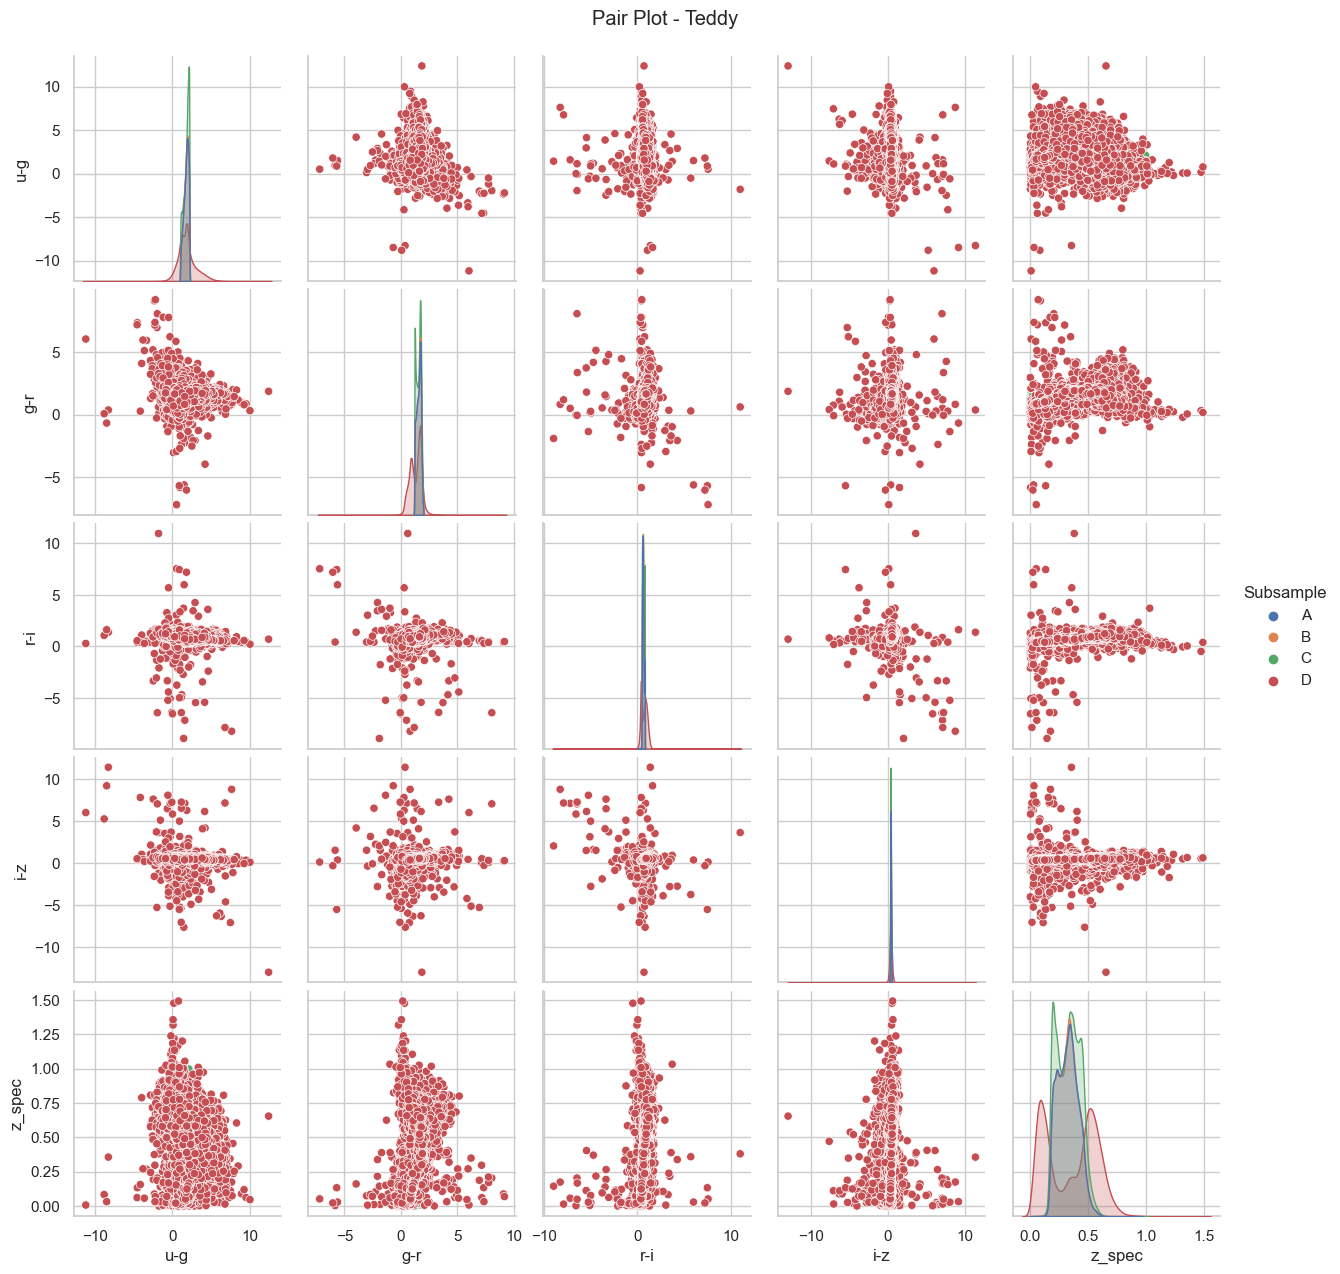

In [34]:
# Pair plots for Teddy dataset
plot_pairplot(teddy, 'Teddy')


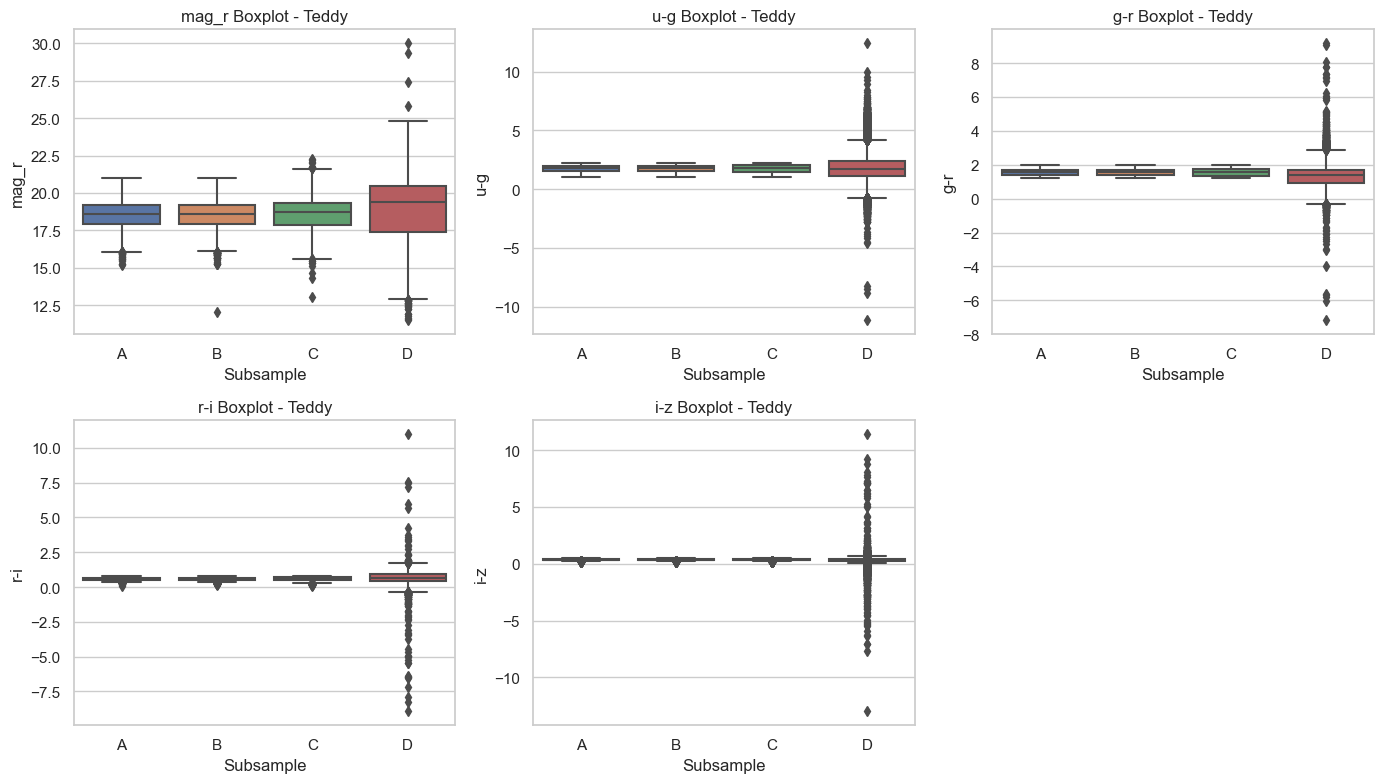

In [35]:
# Box plots for Teddy dataset
plot_boxplots(teddy, 'Teddy')


# 4. Feature Selection and Normalization

In [36]:

# Feature selection: Selecting features for training and testing
features = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5']
target = 'z_spec'

X_happy = happy[features]
y_happy = happy[target]

X_teddy = teddy[features]
y_teddy = teddy[target]

# Normalization: Standardizing the features using StandardScaler
scaler = StandardScaler()
X_happy_scaled = scaler.fit_transform(X_happy)
X_teddy_scaled = scaler.fit_transform(X_teddy)

# Convert the scaled arrays back to dataframes for better readability
X_happy_scaled = pd.DataFrame(X_happy_scaled, columns=features)
X_teddy_scaled = pd.DataFrame(X_teddy_scaled, columns=features)

# Save the scaled datasets for further analysis
X_happy_scaled.to_csv('scaled_happy_features.csv', index=False)
X_teddy_scaled.to_csv('scaled_teddy_features.csv', index=False)
print("Feature selection and normalization are complete. Scaled datasets have been saved.")

Feature selection and normalization are complete. Scaled datasets have been saved.


# 5. Model Development, Training, and Hyperparameter Tuning

In [56]:
# Load the scaled datasets
X_happy = pd.read_csv('scaled_happy_features.csv')
y_happy = pd.read_csv('cleaned_happy_dataset.csv')['z_spec']

X_teddy = pd.read_csv('scaled_teddy_features.csv')
y_teddy = pd.read_csv('cleaned_teddy_dataset.csv')['z_spec']

# Split the data into training and testing sets
X_train_happy, X_test_happy, y_train_happy, y_test_happy = train_test_split(X_happy, y_happy, test_size=0.2, random_state=42)
X_train_teddy, X_test_teddy, y_train_teddy, y_test_teddy = train_test_split(X_teddy, y_teddy, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Hyperparameter tuning for Random Forest, Gradient Boosting, and XGBoost
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


In [60]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Train and evaluate a model, then save and compress it."""
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    
    # Save the model using pickle
    pkl_filename = f'{model_name}.pkl'
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)
    
    # Compress the pickle file using gzip
    compressed_filename = f'{pkl_filename}.gz'
    with open(pkl_filename, 'rb') as f_in, gzip.open(compressed_filename, 'wb') as f_out:
        f_out.writelines(f_in)
    
    # Optionally remove the uncompressed pickle file to save space
    os.remove(pkl_filename)
    
    return rmse, mae

def plot_results(y_true, y_pred, title):
    """Plot true values against predicted values."""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.show()

def train_evaluate_model_with_datasets(models, X_train, y_train, X_tests, dataset_name):
    """Train and evaluate models on different test datasets."""
    for name, model in models.items():
        if name == "Random Forest":
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=2, n_jobs=1, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        elif name == "Gradient Boosting":
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid_gb, cv=2, n_jobs=1, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        elif name == "XGBoost":
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=2, n_jobs=1, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
            best_model.fit(X_train, y_train)

        for test_name, (X_test, y_test) in X_tests.items():
            rmse, mae = train_evaluate_model(best_model, X_train, y_train, X_test, y_test, f'{name}_{dataset_name}_{test_name}')
            print(f"{dataset_name} {test_name} - {name} - RMSE: {rmse}, MAE: {mae}")
            plot_results(y_test, best_model.predict(X_test), f"{dataset_name} {test_name} - True vs Predicted Values ({name})")

Happy Dataset:
Happy B - Random Forest - RMSE: 0.06816707468183628, MAE: 0.04387647311176431


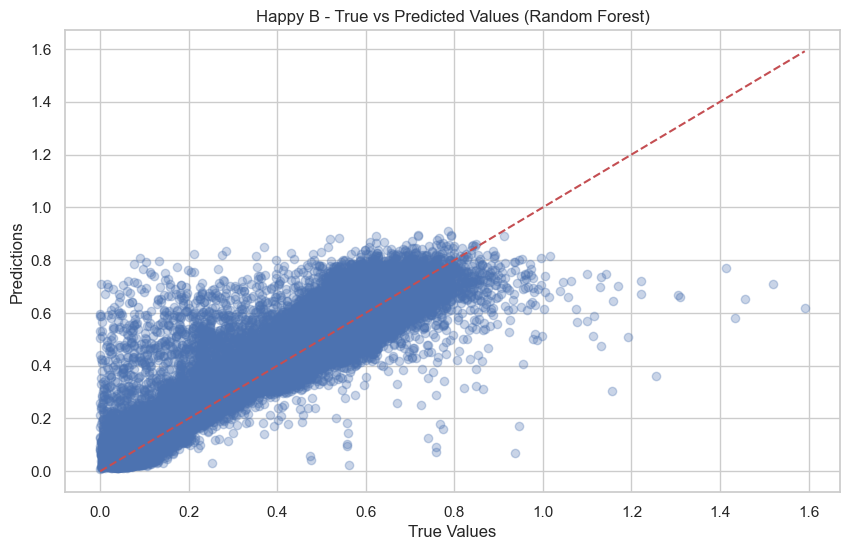

Happy C - Random Forest - RMSE: 0.13837938465105293, MAE: 0.09863730845370344


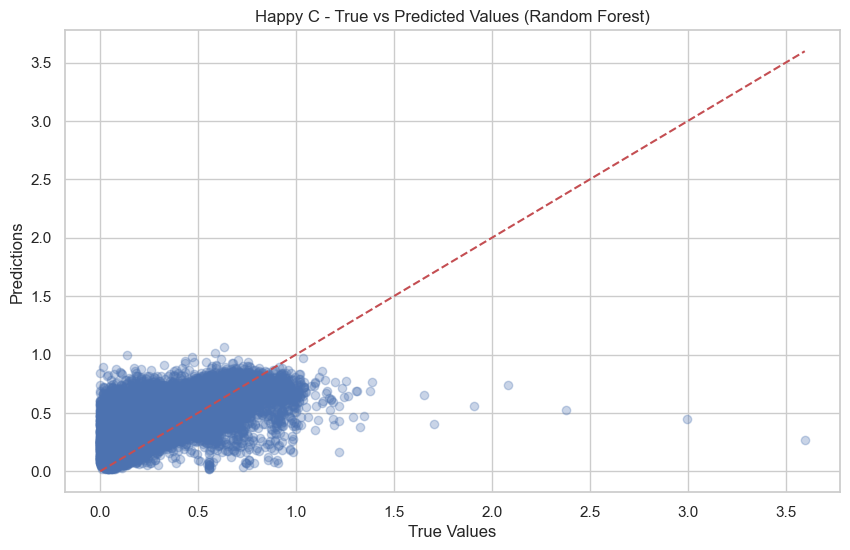

Happy D - Random Forest - RMSE: 0.19688768661493578, MAE: 0.1430391077266425


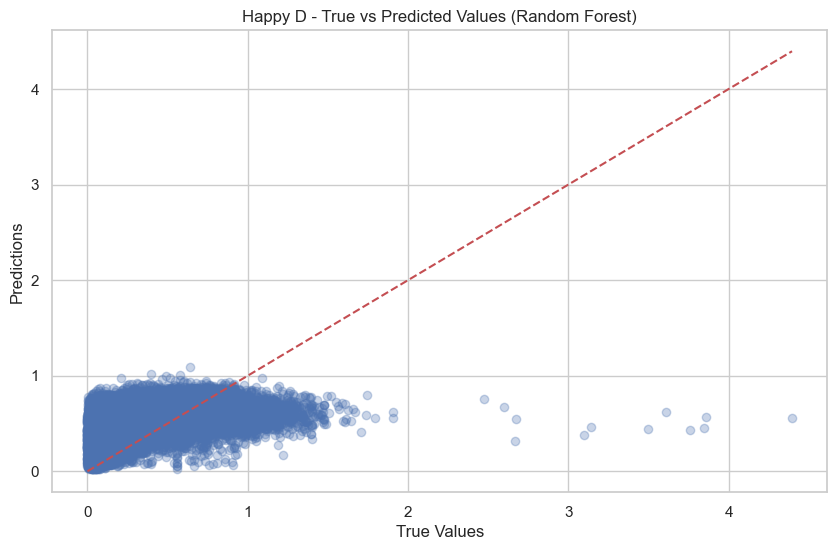

Happy B - Gradient Boosting - RMSE: 0.06568107085004436, MAE: 0.04139868990672532


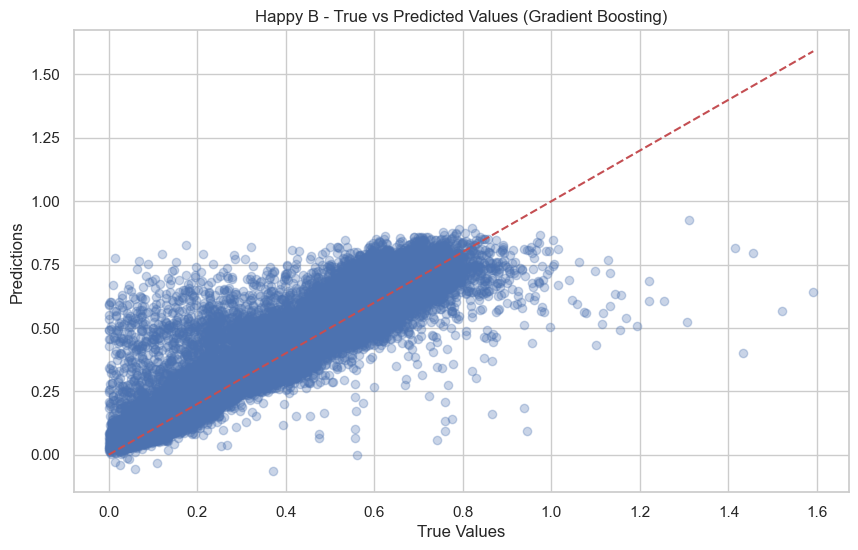

Happy C - Gradient Boosting - RMSE: 0.13500828134255116, MAE: 0.09768154751470268


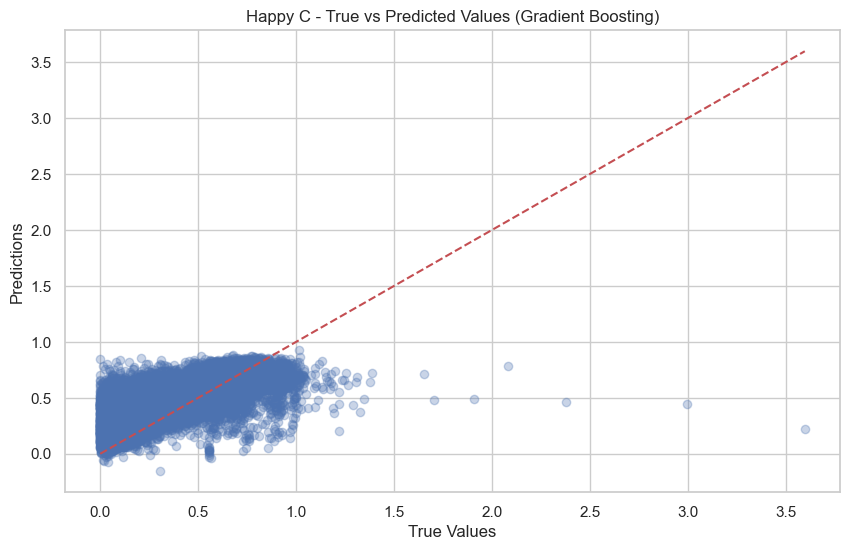

Happy D - Gradient Boosting - RMSE: 0.19380694411360122, MAE: 0.1411248554366758


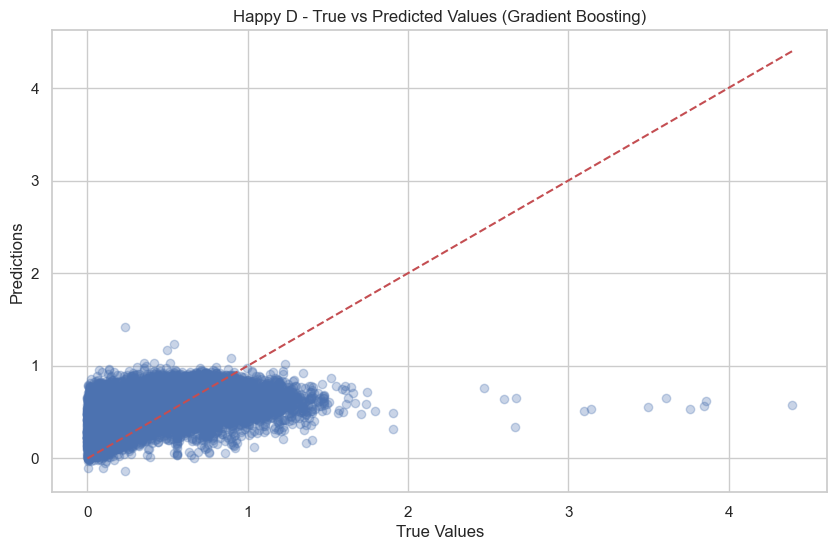

Happy B - Neural Network - RMSE: 0.06492389666534522, MAE: 0.04176561389168416


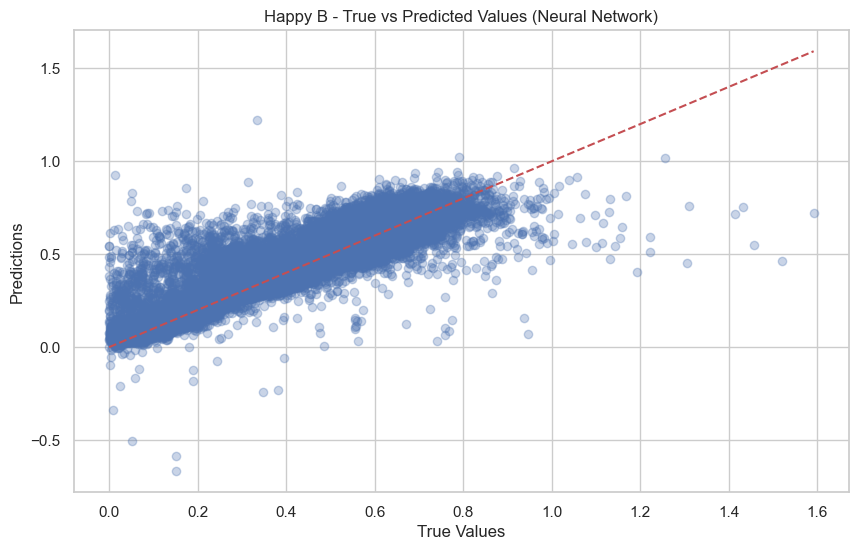

Happy C - Neural Network - RMSE: 0.1278524459186705, MAE: 0.09176925412809069


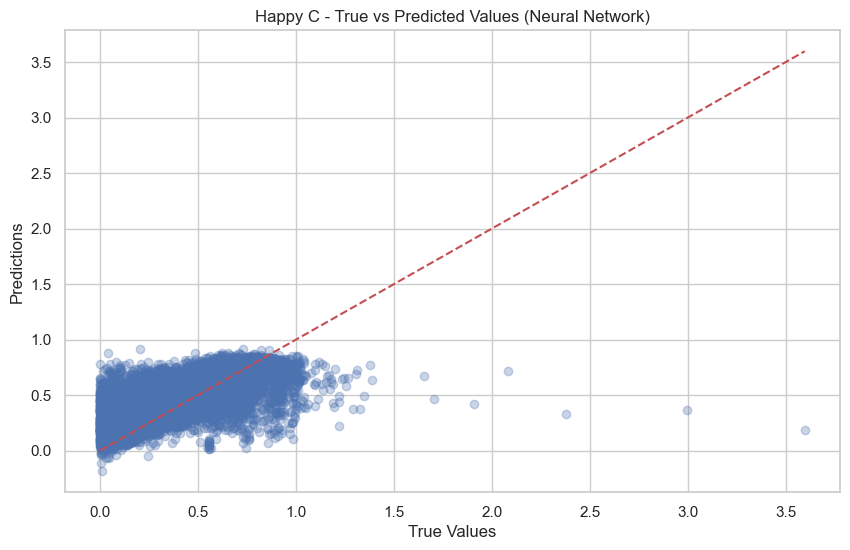

Happy D - Neural Network - RMSE: 0.18107030587796094, MAE: 0.1304759832640974


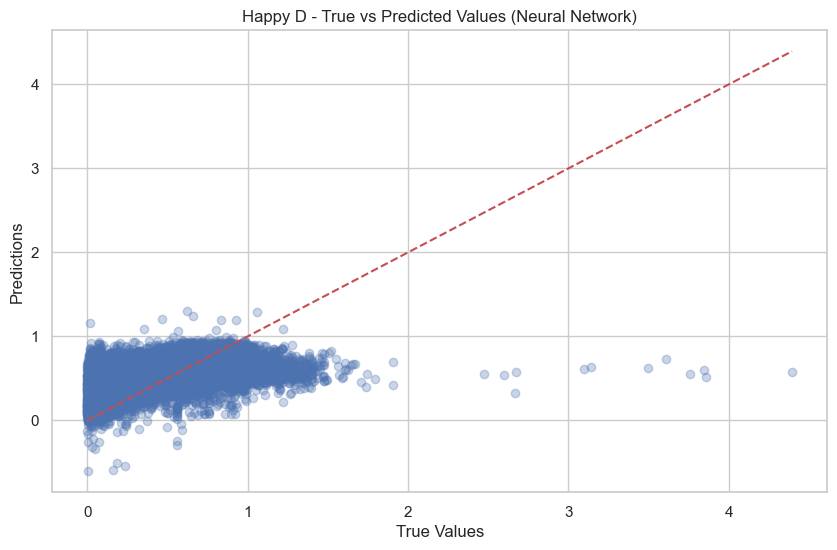

Happy B - Decision Tree - RMSE: 0.11875505731825155, MAE: 0.07401816994659545


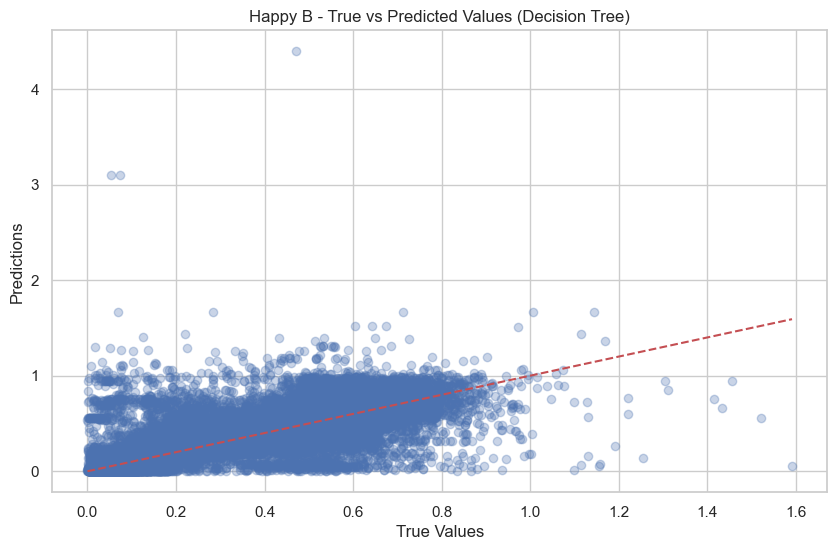

Happy C - Decision Tree - RMSE: 0.21628278944114007, MAE: 0.14726694694520434


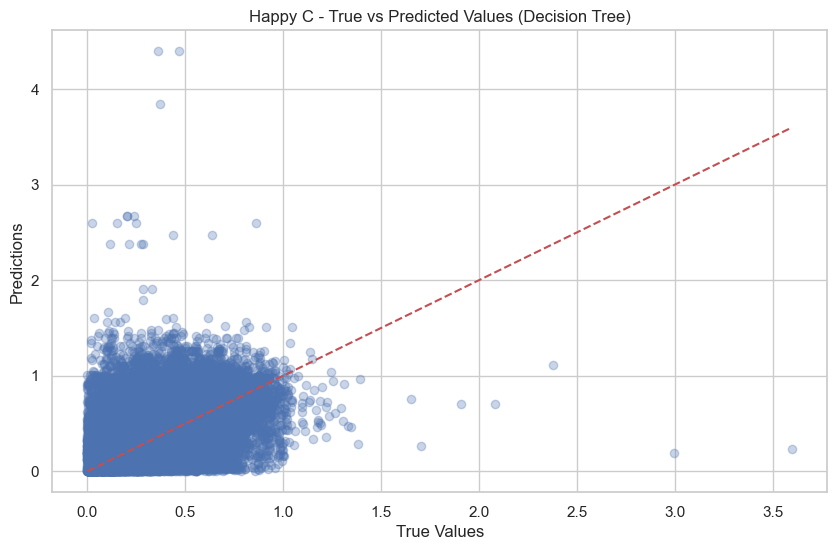

Happy D - Decision Tree - RMSE: 0.32604906444638737, MAE: 0.22972608678759948


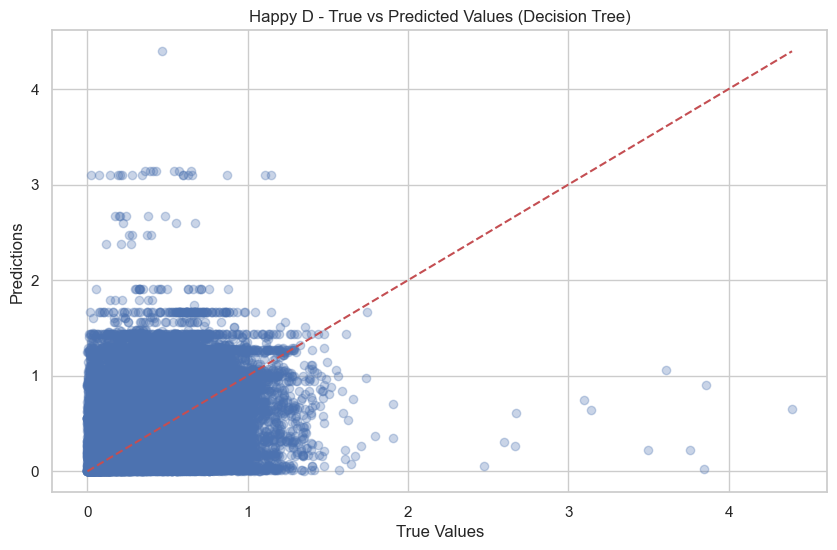

Happy B - XGBoost - RMSE: 0.06689704698268695, MAE: 0.04150942087706054


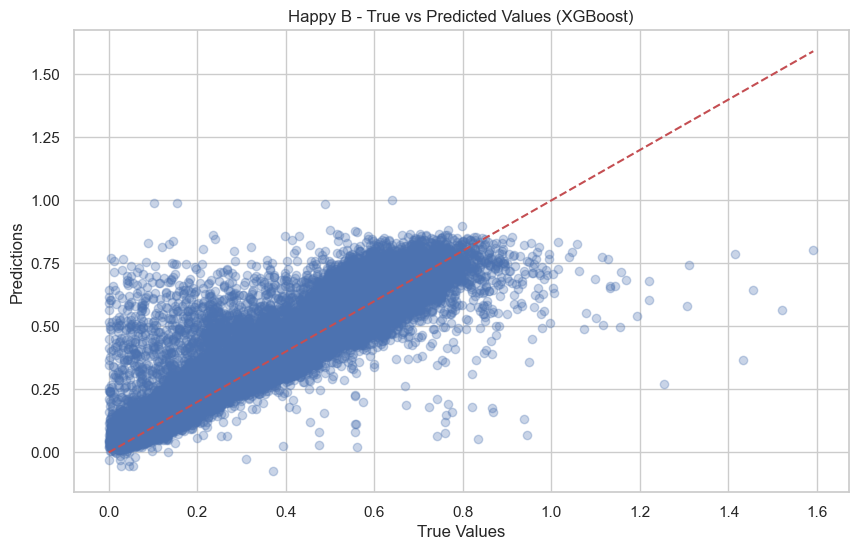

Happy C - XGBoost - RMSE: 0.13458048624008392, MAE: 0.09608889834408745


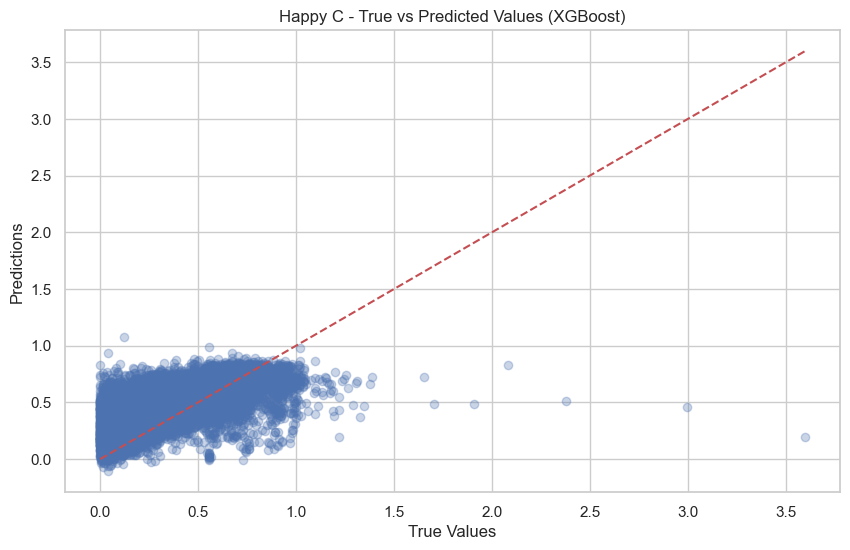

Happy D - XGBoost - RMSE: 0.19183061351626912, MAE: 0.13887978123380668


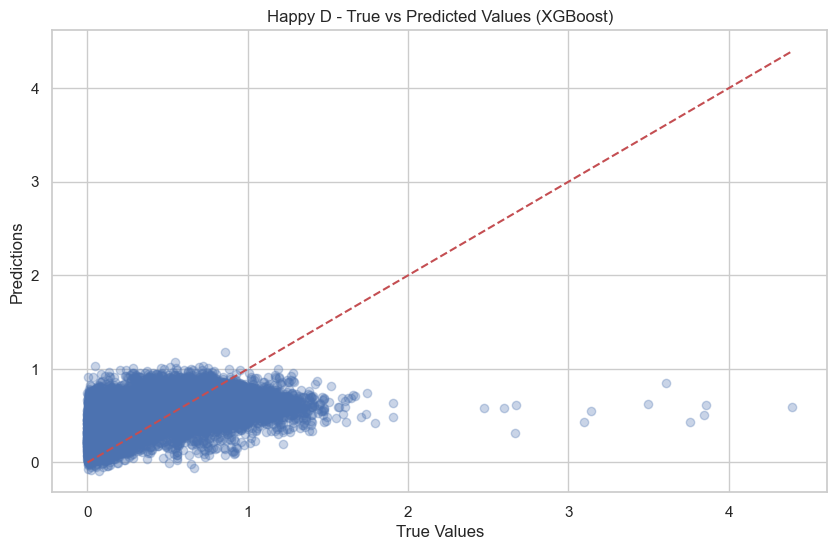

Saving and loading example:
Loaded model RMSE: 0.09880942178109323


In [61]:

# Assume features and target are predefined columns
features = X_happy.columns
target = 'z_spec'

# Happy Dataset Evaluation
print("Happy Dataset:")
X_tests_happy = {
    'B': (happy_B[features], happy_B[target]),
    'C': (happy_C[features], happy_C[target]),
    'D': (happy_D[features], happy_D[target])
}
train_evaluate_model_with_datasets(models, X_train_happy, y_train_happy, X_tests_happy, "Happy")

def save_and_compress_model(model, model_name):
    """Save and compress the model using pickle and gzip."""
    pkl_filename = f'{model_name}.pkl'
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)
    
    compressed_filename = f'{pkl_filename}.gz'
    with open(pkl_filename, 'rb') as f_in, gzip.open(compressed_filename, 'wb') as f_out:
        f_out.writelines(f_in)
    
    os.remove(pkl_filename)

def load_and_decompress_model(model_name):
    """Load and decompress the model from a gzip file."""
    compressed_filename = f'{model_name}.pkl.gz'
    with gzip.open(compressed_filename, 'rb') as f_in:
        with open(f'{model_name}.pkl', 'wb') as f_out:
            f_out.write(f_in.read())
    
    with open(f'{model_name}.pkl', 'rb') as file:
        model = pickle.load(file)
    
    return model

# Example usage of saving and loading models:
print("Saving and loading example:")
model = RandomForestRegressor(random_state=42)
model.fit(X_train_happy, y_train_happy)
save_and_compress_model(model, 'RandomForest_Happy_B')

loaded_model = load_and_decompress_model('RandomForest_Happy_B')
predictions = loaded_model.predict(X_test_happy)
print(f"Loaded model RMSE: {np.sqrt(mean_squared_error(y_test_happy, predictions))}")